## Seaborn简介 

> Seaborn是基于matplotlib的图形可视化python包; Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，应该把Seaborn视为matplotlib的补充，而不是替代物

> Seaborn 要求原始数据的输入类型为 pandas 的 Dataframe 或 Numpy 数组，画图函数有以下几种形式
+ sns.图名(x='X轴 列名', y='Y轴 列名', data=原始数据df对象)
+ sns.图名(x='X轴 列名', y='Y轴 列名', hue='分组绘图参数', data=原始数据df对象)
+ sns.图名(x=np.array, y=np.array[, ...])

[seaborn 0.9 中文文档](https://www.cntofu.com/book/172/README.md)  

[Link1](https://www.jianshu.com/p/94931255aede)
[Link2](https://www.jianshu.com/p/23e78cd76a9f?utm_campaign=maleskine&utm_content=note&utm_medium=seo_notes&utm_source=recommendation)

## 直方图 barplot
> 条形图表示具有每个矩形的高度的数值变量的集中趋势的估计，利用条形的高度反映数值变量的集中趋势，在条形顶部还有误差棒

```python
seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
```

In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.arange(8)
y = np.array([1, 5, 3, 6, 2, 4, 5, 6])
df = pd.DataFrame({"x-axis" : x, "y-axis" : y})
df

,x-axis,y-axis
0,0,1
1,1,5
2,2,3
3,3,6
4,4,2
5,5,4
6,6,5
7,7,6


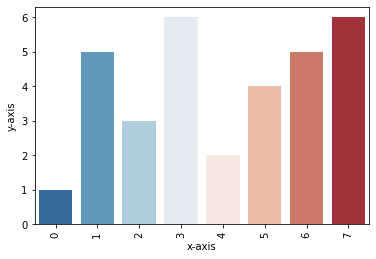

In [5]:
sns.barplot("x-axis", "y-axis", palette="RdBu_r", data=df)
plt.xticks(rotation=90)
plt.show()

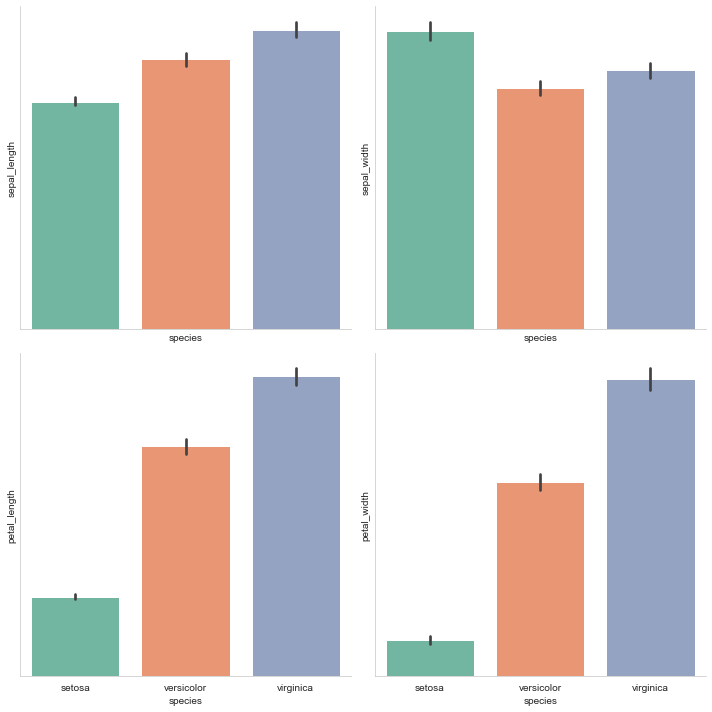

In [57]:
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.despine(right=True, top=True)

sns.barplot(x="species", y="sepal_length", data=iris, palette='Set2', ax=axes[0, 0])
sns.barplot(x="species", y="sepal_width", data=iris, palette='Set2', ax=axes[0, 1])
sns.barplot(x="species", y="petal_length", data=iris, palette='Set2', ax=axes[1, 0])
sns.barplot(x="species", y="petal_width", data=iris, palette='Set2', ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

## 散点图 stripplot

```python
seaborn.stripplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, jitter=False, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)
```

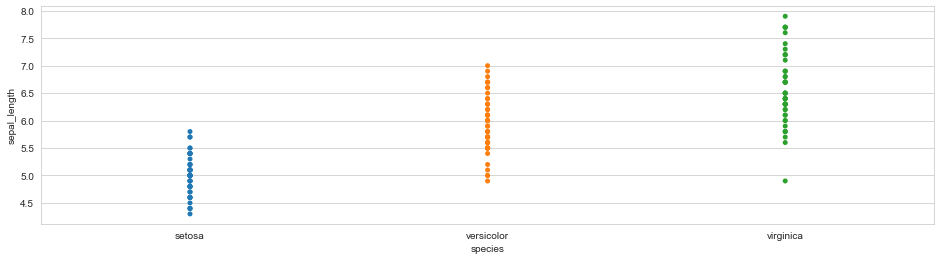

In [39]:
# 加载数据
iris = sns.load_dataset('iris')
iris.dtypes

# 设置画布大小
plt.figure(figsize=(16, 4))

# 设置seaborn样式
sns.set_style("whitegrid")

# 绘制散点图
sns.stripplot(x="species", y="sepal_length", data=iris, jitter=False)

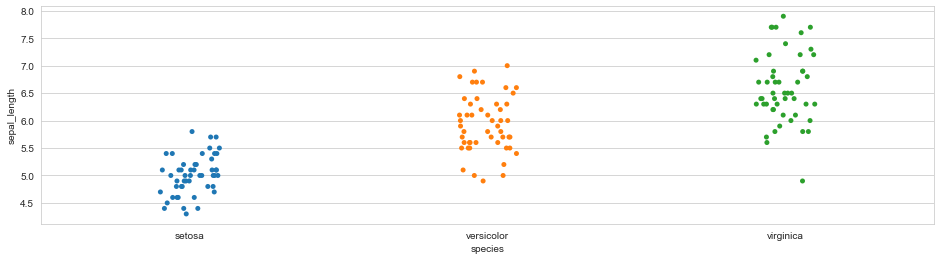

In [38]:
# 通过 jitter 属性为散点图设置抖动，以便更好地观察数据

plt.figure(figsize=(16, 4))
sns.stripplot(x='species', y='sepal_length', data=iris, jitter=True)

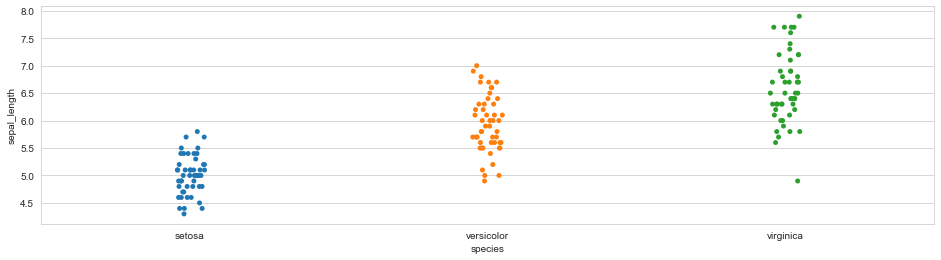

In [40]:
plt.figure(figsize=(16, 4))
sns.stripplot(x='species', y='sepal_length', data=iris, jitter=0.05)

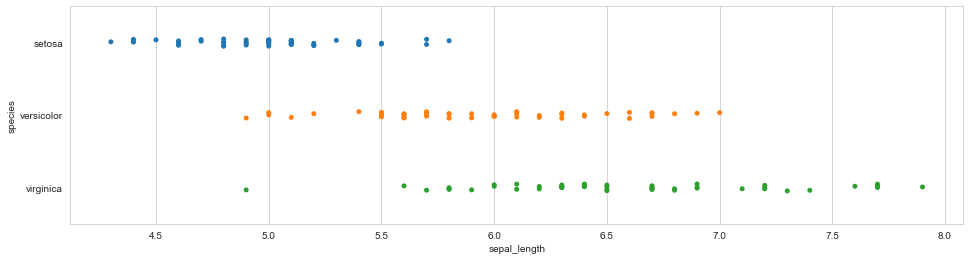

In [41]:
# 改变轴向

plt.figure(figsize=(16, 4))
sns.stripplot(y='species', x='sepal_length', data=iris, jitter=0.05)

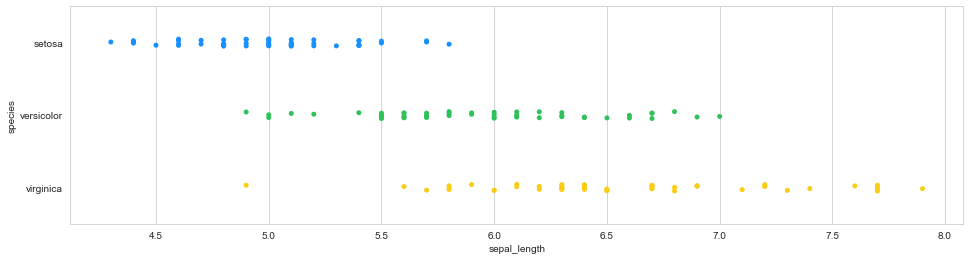

In [42]:
# 改变颜色、样式、大小

plt.figure(figsize=(16, 4))
sns.stripplot(y='species', x='sepal_length', data=iris, jitter=0.05, palette=['#1890FF', '#2FC25B', '#FACC14'])

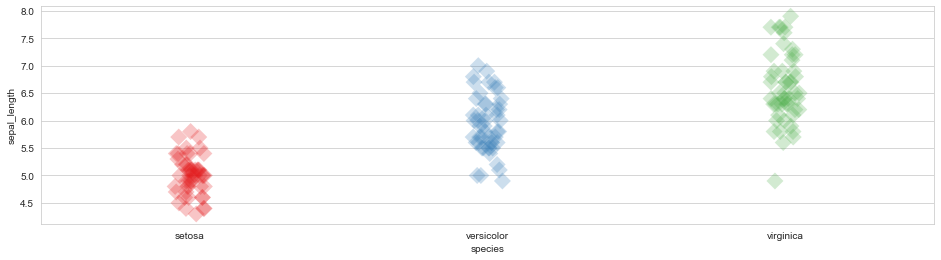

In [45]:
plt.figure(figsize=(16, 4))
sns.stripplot(x='species', y='sepal_length', data=iris, palette='Set1', size=12, 
              marker='D', jitter=0.05, edgecolor='gray', alpha=.25)

#### swarmplot 
> 也是绘制散点图，但它会通过算法，在类别坐标轴的方向上延展那些原本重合的点，与通过 jitter 属性增加抖动有异曲同工之妙

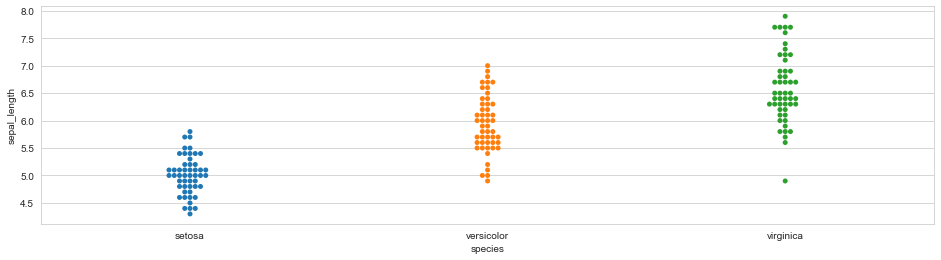

In [46]:
plt.figure(figsize=(16, 4))
sns.swarmplot(x='species', y='sepal_length', data=iris)

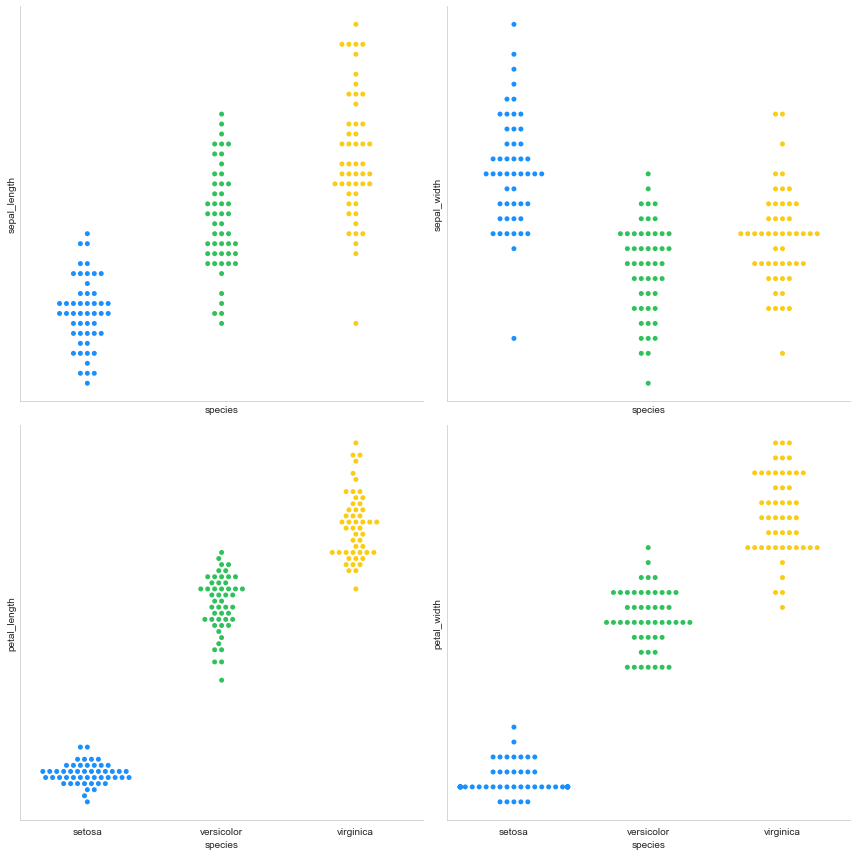

In [51]:
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True)
sns.despine(right=True, top=True)

antV = ['#1890FF', '#2FC25B', '#FACC14', '#223273', '#8543E0', '#13C2C2', '#3436c7', '#F04864']

sns.swarmplot(x='species', y='sepal_length', data=iris, palette=antV, ax=axes[0, 0])
sns.swarmplot(x='species', y='sepal_width', data=iris, palette=antV, ax=axes[0, 1])
sns.swarmplot(x='species', y='petal_length', data=iris, palette=antV, ax=axes[1, 0])
sns.swarmplot(x='species', y='petal_width', data=iris, palette=antV, ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

## 盒图 boxplot
> 通过盒图可以看到数据的最大值、上四分位数Q3、中位数、下四分位数Q1、最小值和异常值的分布

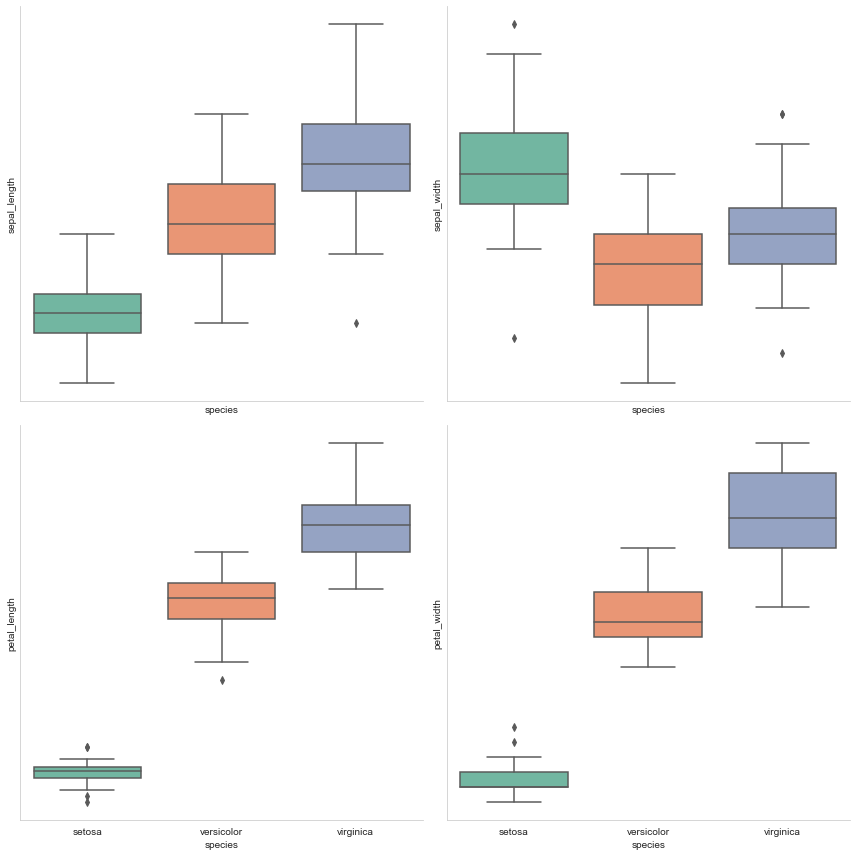

In [53]:
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True)
sns.despine(right=True, top=True)

sns.boxplot(x='species', y='sepal_length', data=iris, palette='Set2', ax=axes[0, 0])
sns.boxplot(x='species', y='sepal_width', data=iris, palette='Set2', ax=axes[0, 1])
sns.boxplot(x='species', y='petal_length', data=iris, palette='Set2', ax=axes[1, 0])
sns.boxplot(x='species', y='petal_width', data=iris, palette='Set2', ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

### violinplot 
> 与 boxplot 相似，但其图形如同小提琴般，可以更好地展现出数据的量化形态

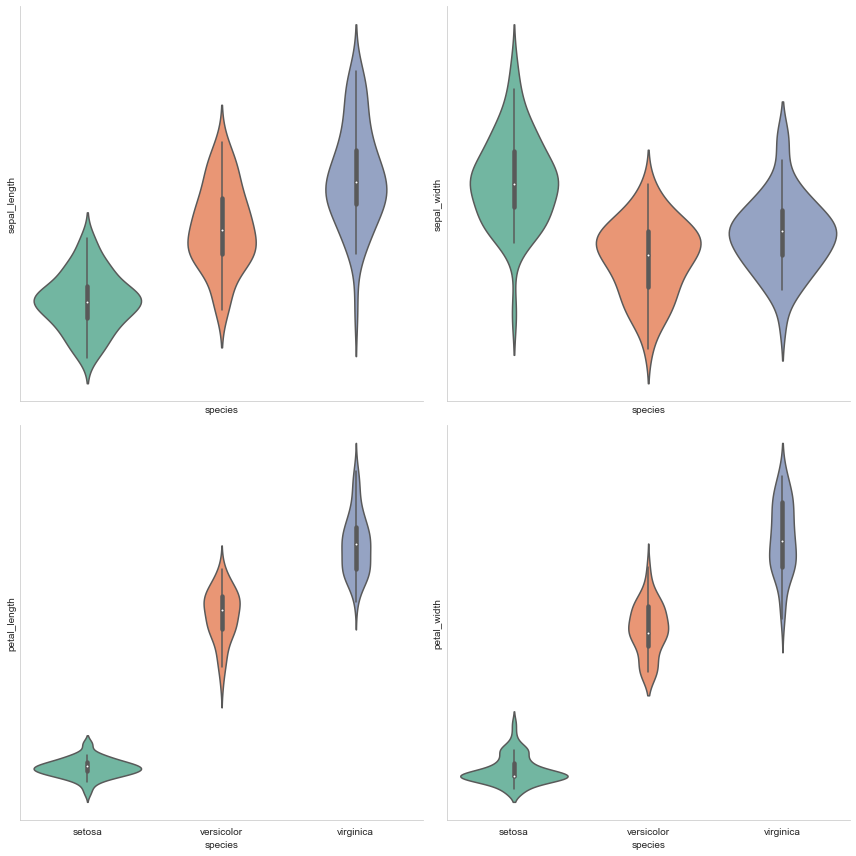

In [54]:
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True)
sns.despine(right=True, top=True)

sns.violinplot(x='species', y='sepal_length', data=iris, palette='Set2', ax=axes[0, 0])
sns.violinplot(x='species', y='sepal_width', data=iris, palette='Set2', ax=axes[0, 1])
sns.violinplot(x='species', y='petal_length', data=iris, palette='Set2', ax=axes[1, 0])
sns.violinplot(x='species', y='petal_width', data=iris, palette='Set2', ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

### stripplot 与 boxplot 组合

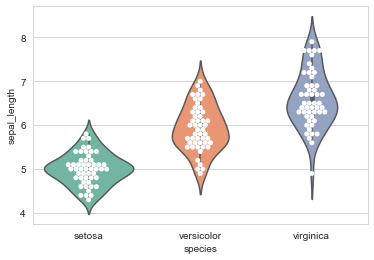

In [55]:
sns.violinplot(x='species', y='sepal_length', data=iris, palette='Set2')
sns.swarmplot(x='species', y='sepal_length', data=iris, color='white', edgecolor='gray')

## 折线图 pointplot
> 可以通过斜率很容易地看出各类别间的主要关系

```python
seaborn.pointplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, markers='o', linestyles='-', dodge=False, join=True, scale=1, orient=None, color=None, palette=None, errwidth=None, capsize=None, ax=None, **kwargs)
```

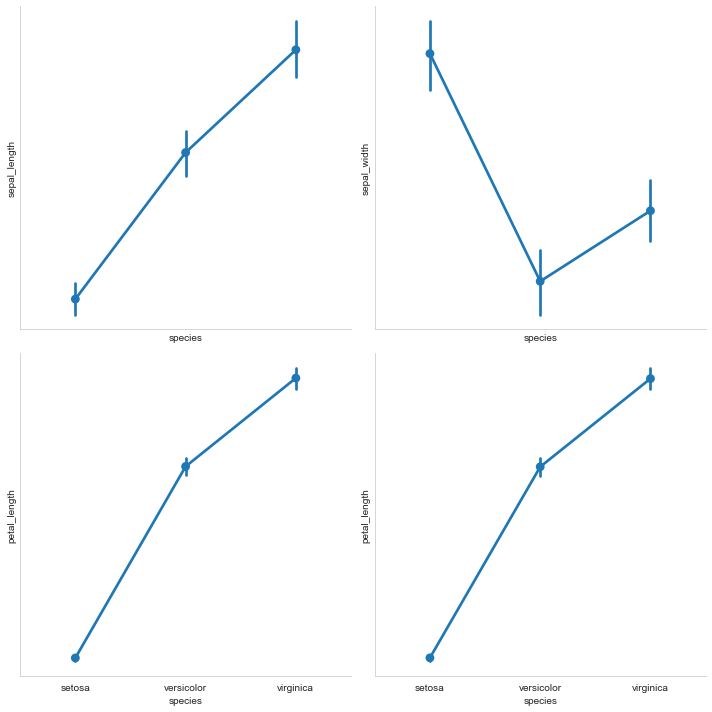

In [58]:
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.despine(right=True, top=True)

sns.pointplot(x='species', y='sepal_length', data=iris, ax=axes[0, 0])
sns.pointplot(x='species', y='sepal_width', data=iris, ax=axes[0, 1])
sns.pointplot(x='species', y='petal_length', data=iris, ax=axes[1, 0])
sns.pointplot(x='species', y='petal_length', data=iris, ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

## PairGrid
> 可用于绘制展现数据集内多个变量之间关系的矩阵图

```python
PairGrid(data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, diag_sharey=True, size=2.5, aspect=1, despine=True, dropna=True)
```

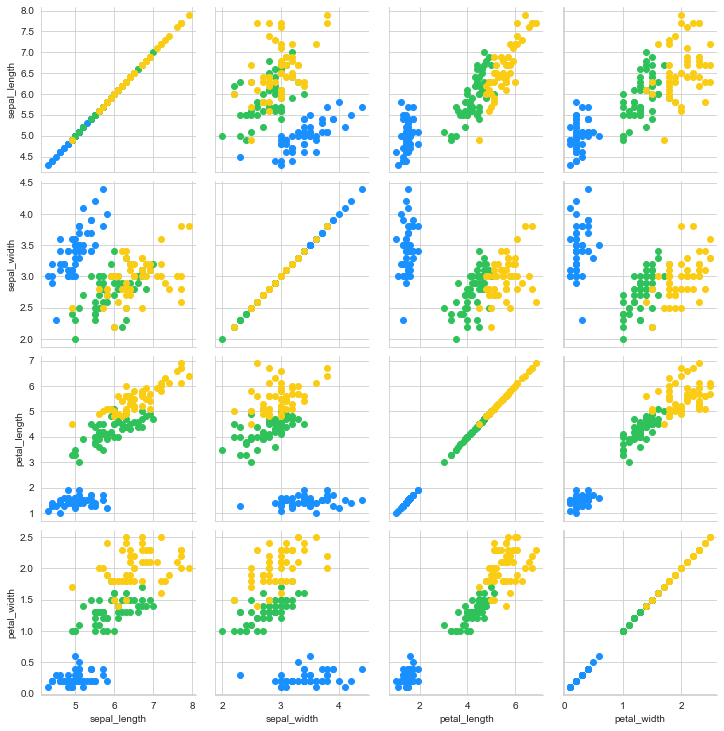

In [62]:
antV = ['#1890FF', '#2FC25B', '#FACC14', '#223273', '#8543E0', '#13C2C2', '#3436c7', '#F04864']
g = sns.PairGrid(data=iris, palette=antV, hue='species')
g.map(plt.scatter)

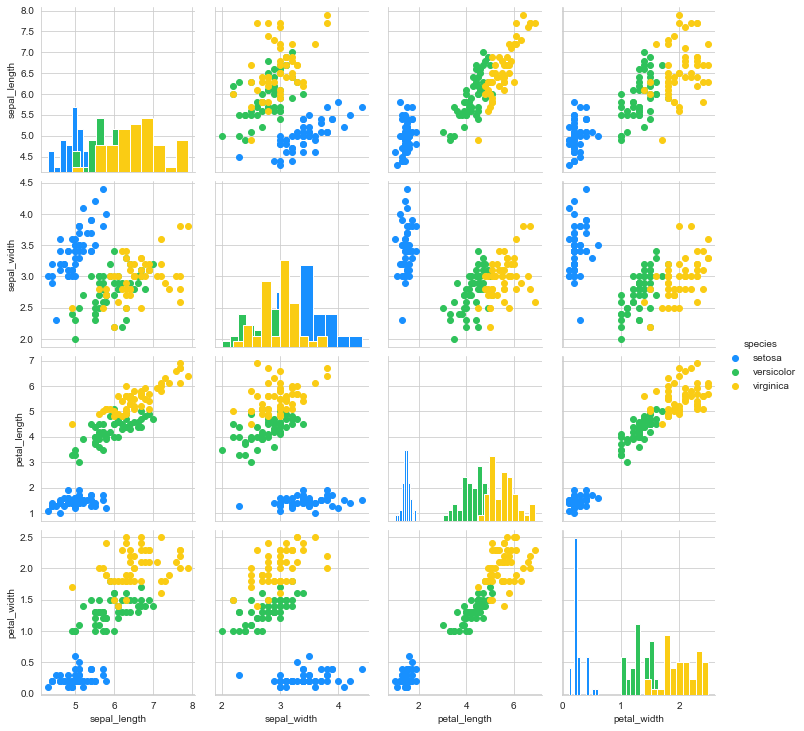

In [63]:
g = sns.PairGrid(data=iris, palette=antV, hue='species')
g = g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

In [61]:
help(sns.PairGrid)

Help on class PairGrid in module seaborn.axisgrid:

class PairGrid(Grid)
 |  Subplot grid for plotting pairwise relationships in a dataset.
 |  
 |  This class maps each variable in a dataset onto a column and row in a
 |  grid of multiple axes. Different axes-level plotting functions can be
 |  used to draw bivariate plots in the upper and lower triangles, and the
 |  the marginal distribution of each variable can be shown on the diagonal.
 |  
 |  It can also represent an additional level of conditionalization with the
 |  ``hue`` parameter, which plots different subsets of data in different
 |  colors. This uses color to resolve elements on a third dimension, but
 |  only draws subsets on top of each other and will not tailor the ``hue``
 |  parameter for the specific visualization the way that axes-level functions
 |  that accept ``hue`` will.
 |  
 |  See the :ref:`tutorial <grid_tutorial>` for more information.
 |  
 |  Method resolution order:
 |      PairGrid
 |      Grid
 |   

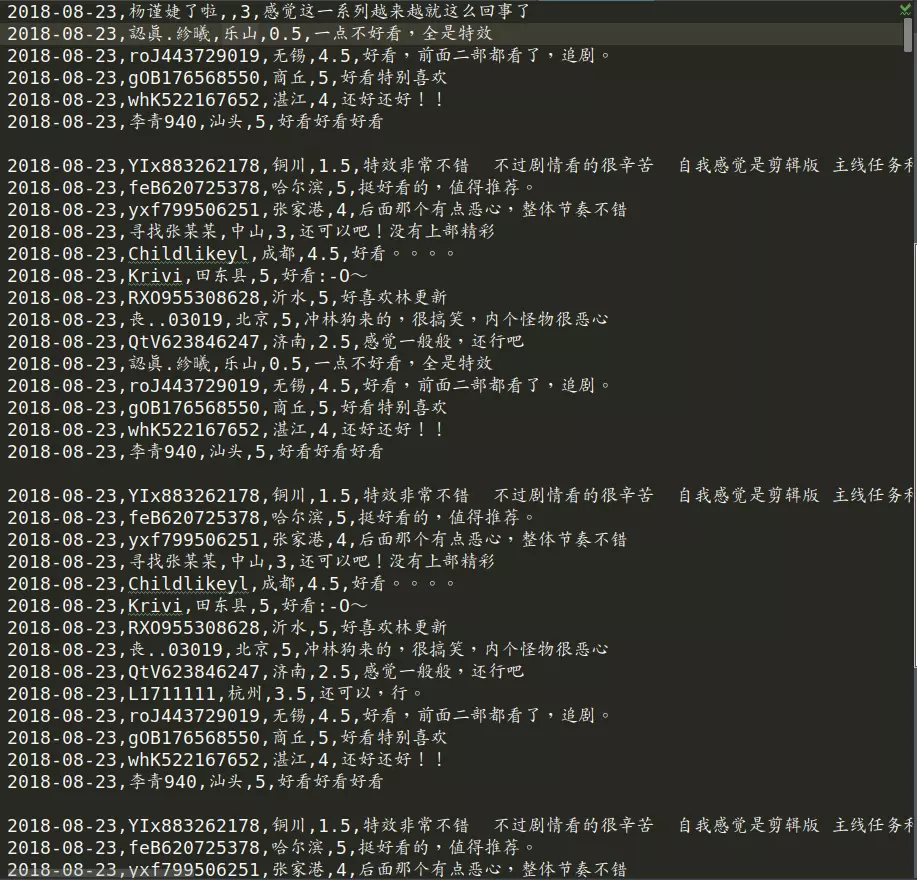

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

f = open('狄仁杰.txt',encoding='UTF-8')
data = pd.read_csv(f, sep=',', header=None, encoding='UTF-8', names=['date','nickname','city','rate','comment'])

#评分分析
rate = data['rate'].value_counts()
sns.set_style("darkgrid")
bar_plot = sns.barplot(x=(rate.index), y=(rate.values/sum(rate)),palette="muted")
plt.xticks(rotation=90)
plt.show()